In [1]:
from distutils.log import warn
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['font.family'] = 'AppleGothic' #malgun Gothic
rcParams['figure.figsize'] = 17,8

import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('titanic.csv',index_col=0)
print(test.shape)
test.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
test.shape

(891, 11)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


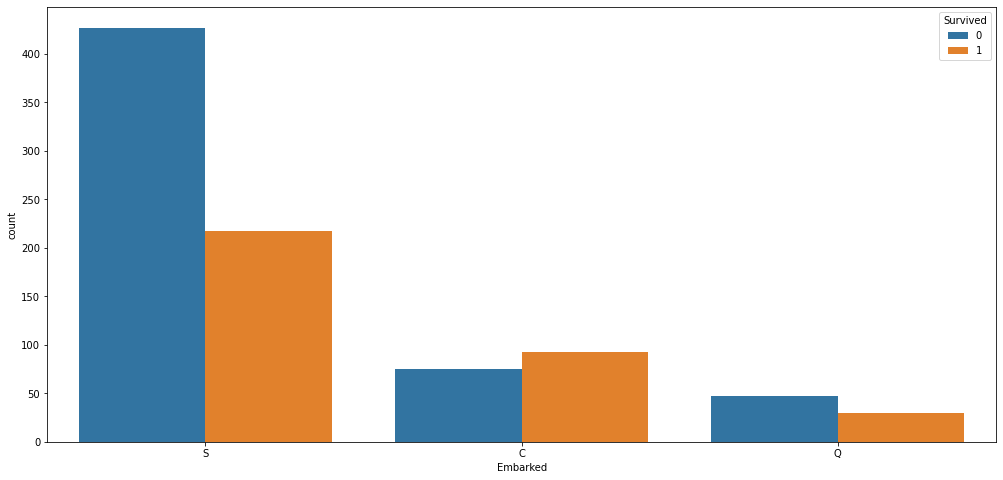

In [5]:
sns.countplot(data=test,x='Embarked', hue='Survived')

In [6]:
#Embarked 칼럼에서 결측치가 있는 데이터 확인
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
#Embarked의 값이 'S'인 데이터 확인
test.loc[test.Embarked.isnull(),'Embarked'] = 'S'

In [8]:
test.Embarked = test.Embarked.fillna("S")

In [9]:
test[test.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


**Q.각각의 승선의 위치마다 승객이 몇몇이 탔을까요? %로 나타내주세요**

In [10]:
test.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
test.Embarked.value_counts()/test.shape[0] * 100

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

**성별에 따라 사람들이 얼마나 생존했는지 알고싶어요(시각화)**

In [12]:
test.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

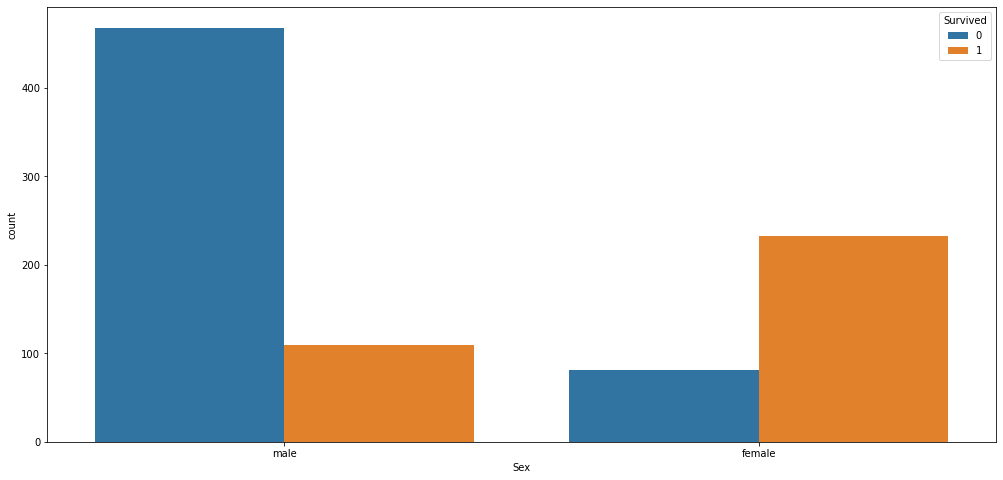

In [13]:
sns.countplot(data = test, x = 'Sex',hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

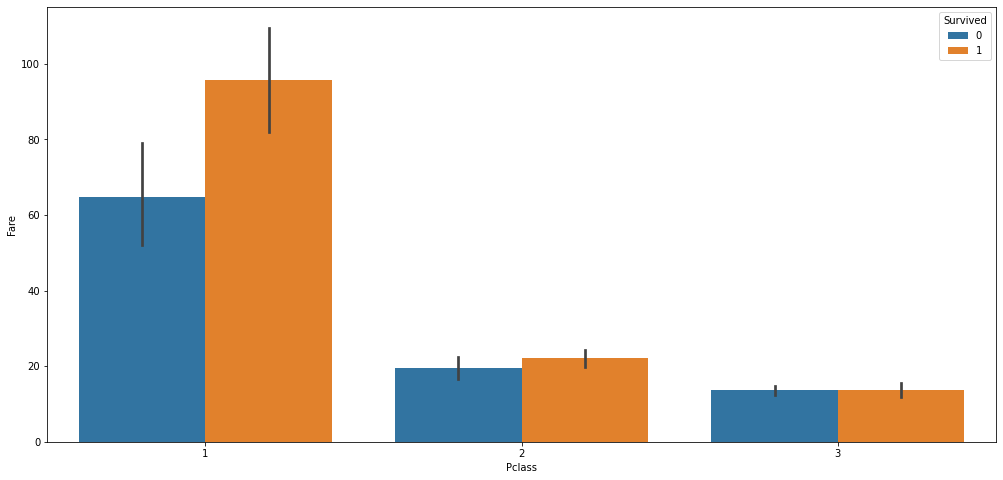

In [14]:
# x축 : Pclass y축 : Fare hue:Survived
sns.barplot(data=test, x='Pclass',y='Fare',hue='Survived')

In [15]:
#요금이 500불 이상인 사람의 데이터를 뽑아주세요
test[test.Fare>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


**Q.위 세명의 승객의 요금을 1/3로 수정해주세요**

In [16]:
test.loc[test.Fare>500, 'Fare'] = 512/3


**Q.생존자/비 생존자의 displot 그리기(요금)**

In [17]:
perish = test[test.Survived==0]
survivor = test[test.Survived==1]

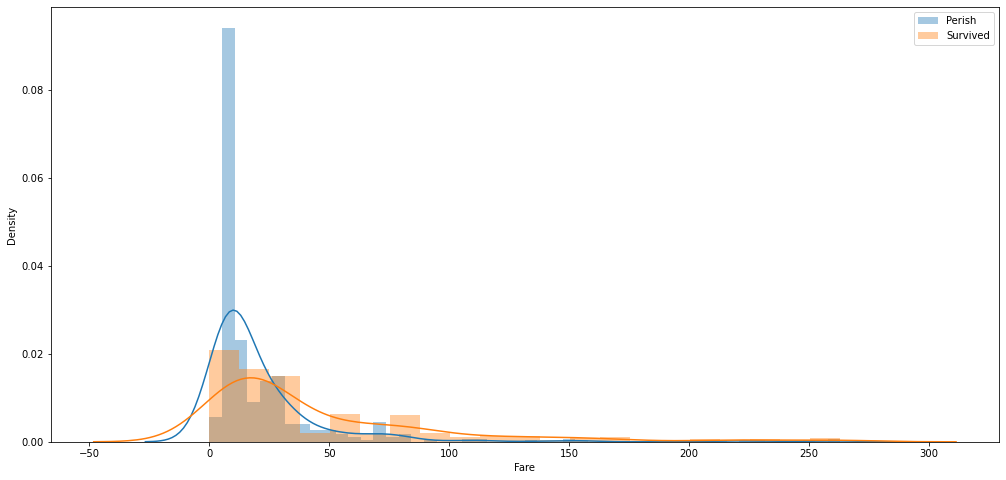

In [18]:
sns.distplot(perish.Fare,label='Perish')
sns.distplot(survivor.Fare,label='Survived')
plt.legend()

### lmplot

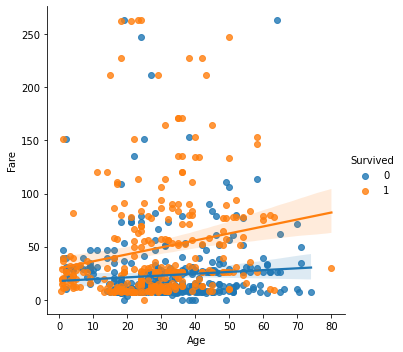

In [19]:
sns.lmplot(data=test, x='Age',y='Fare',hue='Survived')

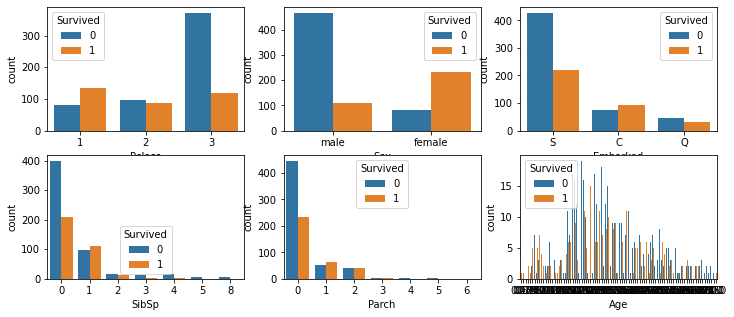

In [51]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(12,5))
sns.countplot(data = test, x = 'Pclass',hue='Survived',ax=ax1)
sns.countplot(data = test, x = 'Sex',hue='Survived',ax=ax2)
sns.countplot(data = test, x = 'Embarked',hue='Survived',ax=ax3)
sns.countplot(data = test, x = 'SibSp',hue='Survived',ax=ax4)
sns.countplot(data = test, x = 'Parch',hue='Survived',ax=ax5)
sns.countplot(data = test, x = 'Age',hue='Survived',ax=ax6)
plt.savefig('titanic.pdf')

In [60]:
#Family_size라는 칼럼을 추가해주세요(Sibsp, Parch)
test['Family_size'] = test.SibSp + test.Parch
test.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


**Q.Family_size를 가지고 0이면 Alone이라는 컬럼 1이라고 기록,**
**0이 아니면 Alone컬럼에 0이라고 기록해주세요**

In [66]:
test.loc[test.Family_size==0, 'Alone']=1
test.loc[test.Family_size!=0, 'Alone']=0
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


<AxesSubplot:xlabel='Family_size', ylabel='count'>

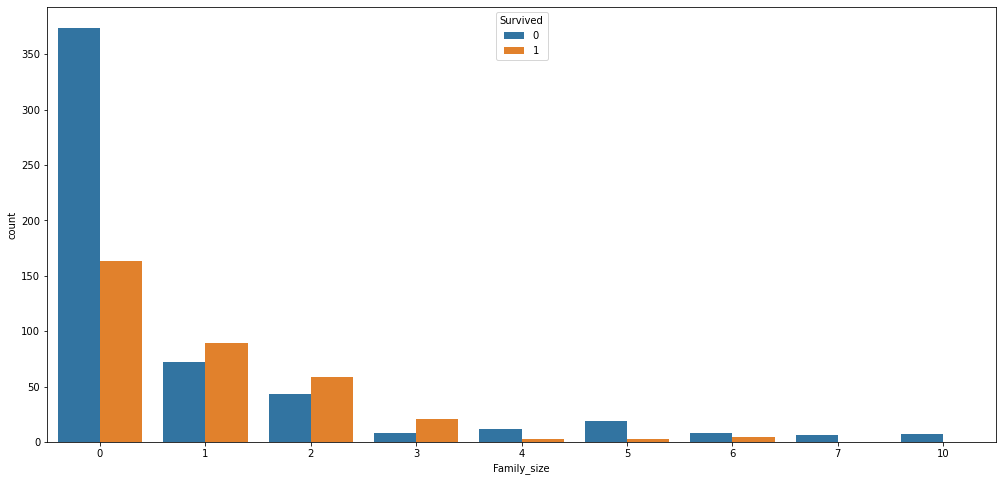

In [67]:
sns.countplot(data=test, x='Family_size',hue='Survived')